# Module 1: Data Science Fundamentals

## Sprint 3: Intro to Modeling

## Subproject 3: Dimensionality Reduction Techniques

Welcome back! We continue our journey through the land of data modeling techniques.

As we've seen before, we can use various types of plots and/or correlation analysis techniques to visualize relationships between features. But when you work with >= 3 dimensions e.g. 5, 10, 15 features, it becomes hard to interpret relationships. We, humans, operate in 3 dimensions. How can you answer questions, such as "Do any of songs have anything in common?" or "Can I expect my machine learning algorithm to learn anything from the data at all?" 

We will explore the concept of _Dimensionality Reduction_ to help tackle us these issues.

## Learning outcomes

- Dimensionality reduction use-cases.
- PCA, t-SNE dimensionality reduction algorithms.

## Dimensionality Reduction

We mainly use dimensionality reduction for 2 purposes:

* To fight [curse of dimensionality](https://deepai.org/machine-learning-glossary-and-terms/curse-of-dimensionality) - by reducing dimensions of the data, we allow modeling algorithms e.g. linear regression to fit data better, it makes them more stable to unseen instances.
* To comprehend multidimensional data - we, humans, cannot interpret data, which has more than 3 dimensions. We'll focus on this now.

## PCA

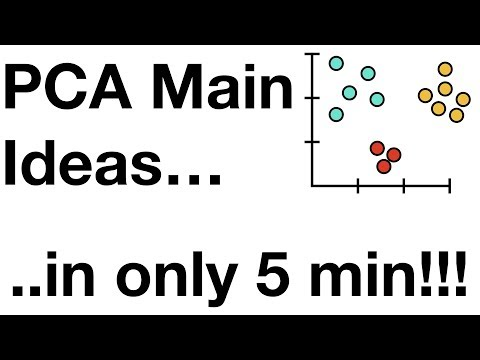

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('HMOI_lkzW08')

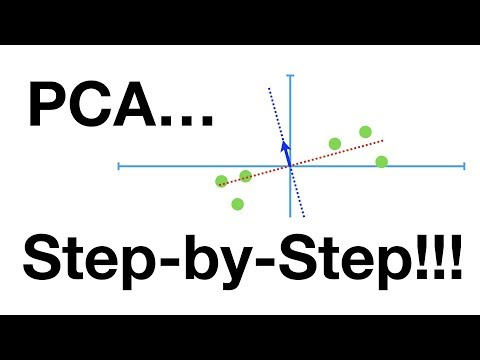

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('FgakZw6K1QQ')

Go through the section of PCA in Intro to Machine Learning course [here](https://classroom.udacity.com/courses/ud120/lessons/2962298545/concepts/30741585800923). Quizes should deepen your understanding of the technique.

## T-SNE

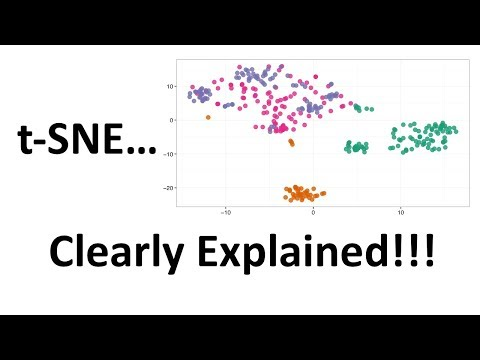

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('NEaUSP4YerM')

Watch this wonderful talk by the author of the algorithm, on the story of it and its use-cases:

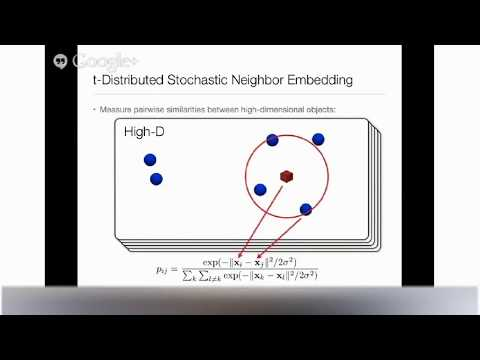

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('RJVL80Gg3lA')

## Exercise

### Visualizing Knowledge of a Model

<div>
    <img style="height: 300px;" src="https://images.unsplash.com/photo-1534250181471-a453fae2231d?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=2134&q=80" />
</div>

Often, data scientists collaborate with machine learning engineers. Modern machine learning specialists use deep learning quite extensively - for image classification to Natural Language Processing (NLP). Although we'll dive deep into machine learning and deep learning only during Sprint 3 and 4, every data scientist should be at least aware of the artifacts machine learning engineers produce and how to analyze them.

For this exercise, we shall evaluate the quality of an NLP model. The model takes a sentence and produces its vector representation. Similar texts should have similar vector representations - they should be close in vector space, which is an indicator of a high quality model. A good model understands semantics of text and "knows" what similarity of text actually means.

We'll study the open dataset of Hillary Clinton's emails, from the 2015 scandal of using email on non-governmental servers.

In [4]:
# Run this cell to install required dependencies
!pip install transformers torch ipywidgets seaborn

     |████████████████████████████████| 2.3MB 15.2MB/s 
     |████████████████████████████████| 901kB 51.4MB/s 
     |████████████████████████████████| 3.3MB 41.5MB/s 


In [5]:
from transformers import pipeline, AutoModelForTokenClassification, AutoTokenizer

embed = pipeline('feature-extraction', model='distilbert-base-cased', tokenizer='distilbert-base-cased')
embed2 = pipeline('feature-extraction', model='distilbert-base-multilingual-cased', tokenizer='distilbert-base-multilingual-cased')

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Some weights of the model checkpoint at distilbert-base-multilingual-cased were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


We've prepared an embedding-producing functions `embed` and `embed2` (for an in-depth explanation regarding what embedding-producing function are, read [this](https://stackoverflow.com/c/turing-college/questions/41)). Each of them takes a list of sentences and produces a list of `768` length float vectors for each input sentence. Both embedding models have fundamental difference - `embed2` model is multilingual, while `embed` supports English-only.

Your objective is to perform dimensionality reduction on text embeddings of the emails, and visualize them. Compare PCA and t-SNE results. Does the model cluster similar texts close to each other in reduced space? Which model is better, in terms of understanding text?

Tips:
* Use seaborn's `hue` to colorize points in 2D space by category. Do you see any patterns?
* Colorize emails by their index. Pick several indexes nearby and inspect email text.

In [6]:
import pandas as pd
import numpy as np

emails = pd.read_csv("https://drive.google.com/uc?export=download&id=12yqWn_Qr0vgdk7-_7mmn7JRkmfi00Un9", compression="zip")
emails = emails[~emails["ExtractedBodyText"].isnull()].reset_index() # some emails have no body
# `ExtractedBodyText` contains full body of an email

In [7]:
# Example of using `embed`. Model outputs 3D matrix of embeddings. We need regular matrix (sentence count x 768).
# -1 is required, fetches last embedding of a single sentence (we'll get into this in Sprint 4).
embeddings = np.array(embed(["Sentence 1", "Sentence 2"]))[:, -1, :]

embeddings.shape, embeddings

((2, 768), array([[ 0.14842378, -0.31946868, -0.36208004, ...,  0.37992957,
          1.09534359, -0.12903301],
        [ 0.20187669, -0.1801285 , -0.50942737, ...,  0.59426796,
          1.16880155,  0.01726869]]))

"FYSA\nProm: Laszczych, Joanne\nSent: Thursday, December 20, 2012 7:57 AM\nTo: Mills, Cheryl D\nSubject: FOX from Caitlin\nVAN SUSTEREN: Senator, there is a report from the State Department that Secretary of State Hillary\nClinton will testify on Benghazi before the middle of January. There has been some criticism of whether or\nnot she has a concussion. I believe she has a concussion. What do you think?\nMCCAIN: I know that in my view, Secretary Clinton, when she said she assumed full responsibility, she\ncertainly has a lot of responsibility for what happened in Benghazi. That's -- that report made that very\nclear. But I must say, I have never seen Secretary Clinton back down from a fight. And I have\nnever seen her back down. And / believe that she is now not physically well enough to testify\nand she will testify the middle of January.\nU.S. Department of State\nCase No. F-2015-04841\nDoc No. C05739855\nDate: 05/13/2015\nSTATE DEPT. - PRODUCED TO HOUSE SELECT BENGHAZI COMM.\nSUBJE

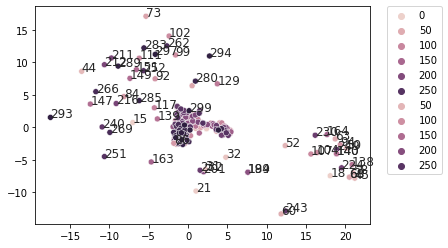

In [8]:
emails = emails.head(300)

embeddings = np.array(embed(emails["ExtractedBodyText"].apply(lambda text: text[:128]).values.tolist()))[:, -1, :]
embeddings.shape

from sklearn.decomposition import PCA
pca = PCA(2)
embs = pca.fit_transform(embeddings)

import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=embs[:, 0], y=embs[:, 1], hue=emails.index)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

from sklearn.manifold import TSNE
embs = TSNE(n_components=2).fit_transform(embeddings)

import seaborn as sns
import matplotlib.pyplot as plt


indexes = np.random.choice(emails.index, 60)
sns.scatterplot(x=embs[indexes, 0], y=embs[indexes, 1], hue=emails.index.values[indexes])
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

sns.set(rc={'figure.figsize':(18,14.27)})

def label_point(x, y, val, ax):
    for _x, _y, _val in zip(x, y, val):
        ax.text(_x, _y, str(_val))

label_point(embs[indexes, 0].tolist(), embs[indexes, 1].tolist(), emails.index.values[indexes], plt.gca())  

emails.iloc[274]["ExtractedBodyText"]
emails.iloc[284]["ExtractedBodyText"]
emails.iloc[217]["ExtractedBodyText"]

-----

## Summary

Let's wrap up this subproject about dimensionality reduction techniques.

Dimensionality reduction techniques serve 2 purposes - to make multidimensional data interpretable and to allow models to generalize better. We've focused on the former part, to reduce multidimensional data into 2 or 3 dimensions that we, humans, can interpret. Reducing dimensions pushes similar data points together, while pushing non-similar points apart. We've explored the application of dimensionality reduction techniques to validate model's performance by interpreting features extracted from raw text, identifying that features close to each other in 2D space are generated from quite similar texts. 

We will come back to these techniques with the project of this sprint.